In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [226]:
folder_path = ".\Data_finan"

dict_df = {}
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    print(file_path)
    if filename.endswith(".xlsx"):
        dict_df[filename.split('.')[0]] = pd.read_excel(file_path)

    if filename.endswith(".csv"):
        dict_df[filename.split('.')[0]] = pd.read_csv(file_path)

print(f"Đã đọc các file: {list(dict_df.keys())}")

for file, df in dict_df.items():
    print(f"\nDữ liệu từ file {file}:")
    print(df.head())

.\Data_finan\data_inflation_VN.xlsx
.\Data_finan\data_SP_500.csv
.\Data_finan\data_stock
.\Data_finan\data_USD_VND.csv
.\Data_finan\data_VN 30.csv
.\Data_finan\data_VN_Index.csv
.\Data_finan\data_XAU_USD.csv
Đã đọc các file: ['data_inflation_VN', 'data_SP_500', 'data_USD_VND', 'data_VN 30', 'data_VN_Index', 'data_XAU_USD']

Dữ liệu từ file data_inflation_VN:
          Ngày Phát Hành Thời gian  Thực tế  Dự báo  Trước đó
0  06/12/2024 (Tháng 11)  02:00:00   0.0013     NaN    0.0033
1  06/11/2024 (Tháng 10)  02:00:00   0.0033     NaN    0.0029
2   06/10/2024 (Tháng 9)  02:00:00   0.0029     NaN    0.0000
3   06/09/2024 (Tháng 8)  02:00:00   0.0000     NaN    0.0048
4   29/07/2024 (Tháng 7)  02:00:00   0.0048     NaN    0.0017

Dữ liệu từ file data_SP_500:
         Ngày  Lần cuối        Mở       Cao      Thấp     KL % Thay đổi
0  09/12/2024  6,052.85  6,083.01  6,088.51  6,048.63  0.00K     -0.61%
1  06/12/2024  6,090.27  6,081.38  6,099.97  6,079.98  0.00K      0.25%
2  05/12/2024  6,075.

In [227]:
for file, df in dict_df.items():
    print(f"\nDữ liệu từ file {file}:")
    print(df.shape)
    print(df.iloc[0])
    print(df.iloc[len(df)-1])



Dữ liệu từ file data_inflation_VN:
(36, 5)
Ngày Phát Hành    06/12/2024 (Tháng 11)
Thời gian                      02:00:00
Thực tế                          0.0013
Dự báo                              NaN
Trước đó                         0.0033
Name: 0, dtype: object
Ngày Phát Hành    29/11/2021
Thời gian           02:00:00
Thực tế               0.0032
Dự báo                   NaN
Trước đó              -0.002
Name: 35, dtype: object

Dữ liệu từ file data_SP_500:
(738, 7)
Ngày          09/12/2024
Lần cuối        6,052.85
Mở              6,083.01
Cao             6,088.51
Thấp            6,048.63
KL                 0.00K
% Thay đổi        -0.61%
Name: 0, dtype: object
Ngày          03/01/2022
Lần cuối        4,796.60
Mở              4,778.10
Cao             4,796.60
Thấp            4,758.20
KL                   NaN
% Thay đổi         0.64%
Name: 737, dtype: object

Dữ liệu từ file data_USD_VND:
(730, 7)
Ngày          03/12/2024
Lần cuối        25,403.0
Mở              25,400.0
Cao         

## Xử lý từng data

In [228]:
def convert_per(df, name_col):
        # Giả sử cột % Thay đổi là một chuỗi object, cần xử lý
    df[name_col] = (
        df[name_col]
        .str.replace('%', '')   # Loại bỏ ký hiệu %
        .str.replace(',', '')   # Loại bỏ dấu phẩy (nếu có)
        .astype(float) / 100    # Chuyển thành float và chia 100 để về dạng thập phân
    )
    return df[name_col]

In [229]:
# Tạo khoảng thời gian từ 1/1/2020 đến 10/10/2024
date_range = pd.date_range(start='2022-01-01', end='2024-10-10', freq='D')

# Tạo DataFrame với các cột yêu cầu
columns = ['Date']
df = pd.DataFrame(columns=columns)

# Gán cột 'Date' với khoảng thời gian
df['Date'] = date_range

# Đặt cột 'Date' làm index
df.set_index('Date', inplace=True)

# Xem DataFrame
print(df)

Empty DataFrame
Columns: []
Index: [2022-01-01 00:00:00, 2022-01-02 00:00:00, 2022-01-03 00:00:00, 2022-01-04 00:00:00, 2022-01-05 00:00:00, 2022-01-06 00:00:00, 2022-01-07 00:00:00, 2022-01-08 00:00:00, 2022-01-09 00:00:00, 2022-01-10 00:00:00, 2022-01-11 00:00:00, 2022-01-12 00:00:00, 2022-01-13 00:00:00, 2022-01-14 00:00:00, 2022-01-15 00:00:00, 2022-01-16 00:00:00, 2022-01-17 00:00:00, 2022-01-18 00:00:00, 2022-01-19 00:00:00, 2022-01-20 00:00:00, 2022-01-21 00:00:00, 2022-01-22 00:00:00, 2022-01-23 00:00:00, 2022-01-24 00:00:00, 2022-01-25 00:00:00, 2022-01-26 00:00:00, 2022-01-27 00:00:00, 2022-01-28 00:00:00, 2022-01-29 00:00:00, 2022-01-30 00:00:00, 2022-01-31 00:00:00, 2022-02-01 00:00:00, 2022-02-02 00:00:00, 2022-02-03 00:00:00, 2022-02-04 00:00:00, 2022-02-05 00:00:00, 2022-02-06 00:00:00, 2022-02-07 00:00:00, 2022-02-08 00:00:00, 2022-02-09 00:00:00, 2022-02-10 00:00:00, 2022-02-11 00:00:00, 2022-02-12 00:00:00, 2022-02-13 00:00:00, 2022-02-14 00:00:00, 2022-02-15 00:00:00

In [230]:
# Hàm nhập dữ liệu vào df
def enter_col(df, col, data):
    if(col not in df.columns):
        df[col] = np.nan
    # print(df.columns)
    for date in data.index: 
        if date in df.index:
            value = str(data[date]).replace(',', '').replace('%', '').strip()
            # print(value)
            df.at[date, col] = float(value)
    print(df.isna().sum())
    return df

### SP_500

In [231]:
dict_df['data_SP_500']['Ngày'] = [pd.to_datetime(date , format='%d/%m/%Y').strftime('%Y-%m-%d') for date in dict_df['data_SP_500']['Ngày']]
dict_df['data_SP_500'].set_index('Ngày',inplace=True)
dict_df['data_SP_500']

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2024-12-09,"6,052.85","6,083.01","6,088.51","6,048.63",0.00K,-0.61%
2024-12-06,"6,090.27","6,081.38","6,099.97","6,079.98",0.00K,0.25%
2024-12-05,"6,075.11","6,089.03","6,094.55","6,072.90",0.00K,-0.19%
2024-12-04,"6,086.49","6,069.39","6,089.84","6,061.06",0.00K,0.61%
2024-12-03,"6,049.88","6,042.97","6,052.07","6,033.39",0.00K,0.05%
...,...,...,...,...,...,...
2022-01-07,"4,677.00","4,697.70","4,707.90","4,662.70",NaN,-0.41%
2022-01-06,"4,696.10","4,693.40","4,725.00","4,671.30",NaN,-0.10%
2022-01-05,"4,700.60","4,788.00","4,797.70","4,699.40",NaN,-1.94%


In [232]:

df = enter_col(df, 'SP_500', dict_df['data_SP_500']['Lần cuối'])
df

SP_500    317
dtype: int64


,SP_500
Date,
2022-01-01,NaN
2022-01-02,NaN
2022-01-03,4796.60
2022-01-04,4793.50
2022-01-05,4700.60
...,...
2024-10-06,NaN
2024-10-07,5695.94
2024-10-08,5751.13


In [233]:
df.isna().sum()

SP_500    317
dtype: int64

### VN_30

In [234]:
dict_df['data_VN 30']['Ngày'] = [pd.to_datetime(date , format='%d/%m/%Y').strftime('%Y-%m-%d') for date in dict_df['data_VN 30']['Ngày']]

dict_df['data_VN 30'].set_index('Ngày',inplace=True)
dict_df['data_VN 30']

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2024-12-03,"1,308.11","1,308.40","1,310.08","1,300.67",69.79K,-0.06%
2024-12-02,"1,308.83","1,315.77","1,317.76","1,303.51",120.80M,-0.19%
2024-11-29,"1,311.26","1,301.34","1,311.67","1,298.64",136.47M,0.75%
2024-11-28,"1,301.52","1,305.79","1,310.41","1,298.43",145.66M,0.04%
2024-11-27,"1,301.06","1,297.28","1,303.99","1,296.94",113.49M,0.14%
...,...,...,...,...,...,...
2022-01-10,"1,514.70","1,531.13","1,537.71","1,514.70",200.03K,-1.14%
2022-01-07,"1,532.24","1,548.77","1,550.47","1,532.24",200.63K,-0.82%
2022-01-06,"1,544.95","1,542.34","1,554.97","1,541.19",231.96K,-0.07%


In [235]:
df = enter_col(df, 'VN_30', dict_df['data_VN 30']['Lần cuối'])
df

SP_500    317
VN_30     324
dtype: int64


,SP_500,VN_30
Date,,
2022-01-01,NaN,NaN
2022-01-02,NaN,NaN
2022-01-03,4796.60,NaN
2022-01-04,4793.50,1558.87
2022-01-05,4700.60,1546.01
...,...,...
2024-10-06,NaN,NaN
2024-10-07,5695.94,1335.48
2024-10-08,5751.13,1339.05


### VN index

In [238]:
dict_df['data_VN_Index']['ngay'] = [pd.to_datetime(date , format='%d/%m/%Y').strftime('%Y-%m-%d') for date in dict_df['data_VN_Index']['ngay']]

dict_df['data_VN_Index'].set_index('ngay',inplace=True)
dict_df['data_VN_Index']


,lan cuoi,mo,cao,thap,KL,thay_doi
ngay,,,,,,
2024-12-03,"1,249.66","1,251.21","1,251.94","1,244.91",266.65K,-0.12%
2024-12-02,"1,251.21","1,250.46","1,258.05","1,247.74",497.42M,0.06%
2024-11-29,"1,250.46","1,242.51","1,250.92","1,241.00",502.81M,0.67%
2024-11-28,"1,242.11","1,246.37","1,250.46","1,240.91",477.49M,0.01%
2024-11-27,"1,241.97","1,242.13","1,245.34","1,239.23",428.81M,-0.01%
...,...,...,...,...,...,...
2022-01-10,"1,503.71","1,528.48","1,536.45","1,503.71",1.38M,-1.62%
2022-01-07,"1,528.48","1,534.10","1,534.52","1,524.96",1.03M,-0.01%
2022-01-06,"1,528.57","1,522.50","1,536.24","1,518.18",1.13M,0.40%


In [239]:
df = enter_col(df, 'VN_Index', dict_df['data_VN_Index']['lan cuoi'])
df = enter_col(df, 'VN_Index_volum', dict_df['data_VN_Index']['thay_doi'])
df

SP_500      317
VN_30       324
VN_Index    324
dtype: int64
SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
dtype: int64


,SP_500,VN_30,VN_Index,VN_Index_volum
Date,,,,
2022-01-01,NaN,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN
2022-01-03,4796.60,NaN,NaN,NaN
2022-01-04,4793.50,1558.87,1525.58,1.82
2022-01-05,4700.60,1546.01,1522.50,-0.20
...,...,...,...,...
2024-10-06,NaN,NaN,NaN,NaN
2024-10-07,5695.94,1335.48,1269.93,-0.05
2024-10-08,5751.13,1339.05,1271.98,0.16


### XAU_USD

In [240]:
dict_df['data_XAU_USD']['Ngày'] = [pd.to_datetime(date , format='%d/%m/%Y').strftime('%Y-%m-%d') for date in dict_df['data_XAU_USD']['Ngày']]

dict_df['data_XAU_USD'].set_index('Ngày',inplace=True)
dict_df['data_XAU_USD']

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2024-12-03,"2,640.45","2,642.35","2,645.23","2,634.27",NaN,0.06%
2024-12-02,"2,638.93","2,653.82","2,656.21","2,621.90",NaN,-0.55%
2024-11-29,"2,653.55","2,641.20","2,666.35","2,634.12",NaN,0.48%
2024-11-28,"2,640.96","2,635.74","2,650.12","2,620.94",NaN,0.21%
2024-11-27,"2,635.51","2,632.16","2,658.40","2,627.06",NaN,0.14%
...,...,...,...,...,...,...
2022-01-07,"1,795.63","1,789.55","1,799.20","1,782.63",NaN,0.39%
2022-01-06,"1,788.68","1,809.94","1,811.89","1,786.03",NaN,-1.15%
2022-01-05,"1,809.53","1,814.90","1,829.82","1,807.97",NaN,-0.28%


In [241]:
df = enter_col(df, 'XAU_USD', dict_df['data_XAU_USD']['Lần cuối'])
df = enter_col(df, 'XAU_USD_volum', dict_df['data_XAU_USD']['% Thay đổi'])
df

SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
dtype: int64
SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
XAU_USD_volum     292
dtype: int64


,SP_500,VN_30,VN_Index,VN_Index_volum,XAU_USD,XAU_USD_volum
Date,,,,,,
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,4796.60,NaN,NaN,NaN,1800.85,-1.51
2022-01-04,4793.50,1558.87,1525.58,1.82,1814.56,0.76
2022-01-05,4700.60,1546.01,1522.50,-0.20,1809.53,-0.28
...,...,...,...,...,...,...
2024-10-06,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-07,5695.94,1335.48,1269.93,-0.05,2643.58,-0.33
2024-10-08,5751.13,1339.05,1271.98,0.16,2621.94,-0.82


### inflation_VN

In [242]:
for date in dict_df['data_inflation_VN']['Ngày Phát Hành']:
    dict_df['data_inflation_VN']['Ngày Phát Hành'] = date.split('(')[0]
dict_df['data_inflation_VN'].set_index('Ngày Phát Hành',inplace=True)
dict_df['data_inflation_VN']

,Thời gian,Thực tế,Dự báo,Trước đó
Ngày Phát Hành,,,,
29/11/2021,02:00:00,0.0013,NaN,0.0033
29/11/2021,02:00:00,0.0033,NaN,0.0029
29/11/2021,02:00:00,0.0029,NaN,0.0000
29/11/2021,02:00:00,0.0000,NaN,0.0048
29/11/2021,02:00:00,0.0048,NaN,0.0017
29/11/2021,02:00:00,0.0017,NaN,0.0005
29/11/2021,02:00:00,0.0005,NaN,0.0007
29/11/2021,02:00:00,0.0007,NaN,-0.0023
29/11/2021,02:00:00,-0.0023,NaN,0.0104


In [243]:
# enter_col(df, 'inflation_VN', dict_df['data_inflation_VN']['Thực tế'])
# df

### USD_VND

In [244]:
dict_df['data_USD_VND']['Ngày'] = [pd.to_datetime(date , format='%d/%m/%Y').strftime('%Y-%m-%d') for date in dict_df['data_USD_VND']['Ngày']]

dict_df['data_USD_VND'].set_index('Ngày',inplace=True)
dict_df['data_USD_VND']

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2024-12-03,"25,403.0","25,400.0","25,405.0","25,346.5",NaN,0.11%
2024-12-02,"25,374.0","25,355.0","25,385.0","25,335.0",NaN,0.12%
2024-11-29,"25,344.0","25,335.0","25,400.0","25,335.0",NaN,-0.06%
2024-11-28,"25,358.0","25,345.0","25,400.0","25,320.0",NaN,-0.07%
2024-11-27,"25,375.0","25,395.0","25,410.0","25,375.0",NaN,-0.12%
...,...,...,...,...,...,...
2022-01-10,"22,695.0","22,752.5","22,760.0","22,675.0",0.03K,0.04%
2022-01-07,"22,685.0","22,745.0","22,751.5","22,685.0",0.02K,-0.26%
2022-01-06,"22,745.0","22,757.5","22,811.0","22,747.5",0.02K,-0.04%


In [245]:
df = enter_col(df, 'USD_VND', dict_df['data_USD_VND']['Lần cuối'])
df = enter_col(df, 'USD_VND_volum', dict_df['data_USD_VND']['% Thay đổi'])
df

SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
XAU_USD_volum     292
USD_VND           322
dtype: int64
SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
XAU_USD_volum     292
USD_VND           322
USD_VND_volum     322
dtype: int64


,SP_500,VN_30,VN_Index,VN_Index_volum,XAU_USD,XAU_USD_volum,USD_VND,USD_VND_volum
Date,,,,,,,,
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,4796.60,NaN,NaN,NaN,1800.85,-1.51,NaN,NaN
2022-01-04,4793.50,1558.87,1525.58,1.82,1814.56,0.76,22752.0,-0.32
2022-01-05,4700.60,1546.01,1522.50,-0.20,1809.53,-0.28,22755.0,0.01
...,...,...,...,...,...,...,...,...
2024-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-07,5695.94,1335.48,1269.93,-0.05,2643.58,-0.33,24840.0,0.34
2024-10-08,5751.13,1339.05,1271.98,0.16,2621.94,-0.82,24835.0,-0.02


### Giá vàng, dầu, bitcoin

In [246]:
import yfinance as yf

# Tải dữ liệu giá vàng hợp đồng tương lai (GC=F) từ Yahoo Finance
data_G = yf.download("GC=F", start="2022-01-01", end="2024-10-15")
print(data_G)

# Giá dầu thô
data_E = yf.download("BZ=F", start="2022-01-01", end="2024-10-15")
print(data_E)

# Giá Bitcoin
data_B = yf.download("BTC-USD", start="2022-01-01", end="2024-10-15")
print(data_B)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2022-01-03  1799.400024  1830.099976  1798.800049  1830.099976    116
2022-01-04  1814.000000  1815.300049  1800.000000  1800.500000     38
2022-01-05  1824.599976  1824.599976  1813.099976  1813.099976      8
2022-01-06  1788.699951  1791.300049  1787.099976  1787.099976     30
2022-01-07  1797.000000  1797.000000  1784.400024  1791.800049     17
...                 ...          ...          ...          ...    ...
2024-10-08  2615.000000  2639.000000  2609.300049  2639.000000    687
2024-10-09  2606.000000  2607.699951  2603.000000  2603.000000    152
2024-10-10  2620.600098  2628.300049  2602.500000  2602.500000    320
2024-10-11  2657.600098  2658.100098  2638.199951  2638.300049     12
2024-10-14  2647.800049  2655.300049  2647.800049  2655.000000     40

[699 rows x 5 colum

In [247]:
# Làm phẳng multi-level columns
if isinstance(data_G.columns, pd.MultiIndex):
    data_G.columns = [col[0] for col in data_G.columns.values]

if isinstance(data_E.columns, pd.MultiIndex):
    data_E.columns = [col[0] for col in data_E.columns.values]

if isinstance(data_B.columns, pd.MultiIndex):
    data_B.columns = [col[0] for col in data_B.columns.values]

In [248]:
# Nhập dữ liệu vào df
df = enter_col(df, 'Gold', data_G['Close'])
df = enter_col(df, 'Gold_volum', data_G['Volume'])

df = enter_col(df, 'Oil', data_E['Close'])
df = enter_col(df, 'Oil_volum', data_E['Volume'])

df = enter_col(df, 'Bitcoin', data_B['Close'])
df = enter_col(df, 'Bitcoin_volum', data_B['Volume'])

df

SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
XAU_USD_volum     292
USD_VND           322
USD_VND_volum     322
Gold              317
dtype: int64
SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
XAU_USD_volum     292
USD_VND           322
USD_VND_volum     322
Gold              317
Gold_volum        317
dtype: int64
SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
XAU_USD_volum     292
USD_VND           322
USD_VND_volum     322
Gold              317
Gold_volum        317
Oil               316
dtype: int64
SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
XAU_USD_volum     292
USD_VND           322
USD_VND_volum     322
Gold              317
Gold_volum        317
Oil               316
Oil_volum         316
dtype: int64
SP_500            317
VN

,SP_500,VN_30,VN_Index,VN_Index_volum,XAU_USD,XAU_USD_volum,USD_VND,USD_VND_volum,Gold,Gold_volum,Oil,Oil_volum,Bitcoin,Bitcoin_volum
Date,,,,,,,,,,,,,,
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47686.812500,2.458267e+10
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47345.218750,2.795157e+10
2022-01-03,4796.60,NaN,NaN,NaN,1800.85,-1.51,NaN,NaN,1799.400024,116.0,78.980003,27224.0,46458.117188,3.307163e+10
2022-01-04,4793.50,1558.87,1525.58,1.82,1814.56,0.76,22752.0,-0.32,1814.000000,38.0,80.000000,31321.0,45897.574219,4.249468e+10
2022-01-05,4700.60,1546.01,1522.50,-0.20,1809.53,-0.28,22755.0,0.01,1824.599976,8.0,80.800003,35152.0,43569.003906,3.685108e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62818.953125,1.477623e+10
2024-10-07,5695.94,1335.48,1269.93,-0.05,2643.58,-0.33,24840.0,0.34,2644.800049,284.0,80.930000,55050.0,62236.660156,3.425356e+10
2024-10-08,5751.13,1339.05,1271.98,0.16,2621.94,-0.82,24835.0,-0.02,2615.000000,687.0,77.180000,66184.0,62131.968750,2.813448e+10


### Xử lý dữ liệu chứng khoán

In [249]:
# Thay đường dẫn này bằng đường dẫn đến thư mục chứa file CSV
folder_path = r'./data_finan/data_stock'


In [250]:


# Lặp qua tất cả các file trong thư mục
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Chỉ đọc các file CSV
        file_path = os.path.join(folder_path, file_name)
        # Đọc file CSV và thêm vào danh sách
        df_stock = pd.read_csv(file_path)
        df_stock.set_index('Ngày',inplace=True)
        
        name_stock = file_name.split('.')[0]  # Tên mã cổ phiếu
        df_stock = enter_col(df, name_stock, df_stock['Lần cuối'])
        df_stock.interpolate(method ='linear', limit_direction ='forward', inplace=True) 
        df_stock = df_stock.dropna()
        df_stock.to_csv(rf'./data_model/{name_stock}.csv')
        df.drop(columns=[name_stock], inplace=True)

df





SP_500            317
VN_30             324
VN_Index          324
VN_Index_volum    324
XAU_USD           292
XAU_USD_volum     292
USD_VND           322
USD_VND_volum     322
Gold              317
Gold_volum        317
Oil               316
Oil_volum         316
Bitcoin             0
Bitcoin_volum       0
ACB               325
dtype: int64
SP_500              2
VN_30               3
VN_Index            3
VN_Index_volum      3
XAU_USD             2
XAU_USD_volum       2
USD_VND             3
USD_VND_volum       3
Gold                2
Gold_volum          2
Oil                 2
Oil_volum           2
Bitcoin             0
Bitcoin_volum       0
BCM               325
dtype: int64
SP_500              2
VN_30               3
VN_Index            3
VN_Index_volum      3
XAU_USD             2
XAU_USD_volum       2
USD_VND             3
USD_VND_volum       3
Gold                2
Gold_volum          2
Oil                 2
Oil_volum           2
Bitcoin             0
Bitcoin_volum       0
BID   

,SP_500,VN_30,VN_Index,VN_Index_volum,XAU_USD,XAU_USD_volum,USD_VND,USD_VND_volum,Gold,Gold_volum,Oil,Oil_volum,Bitcoin,Bitcoin_volum
Date,,,,,,,,,,,,,,
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47686.812500,2.458267e+10
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47345.218750,2.795157e+10
2022-01-03,4796.600000,NaN,NaN,NaN,1800.85,-1.510000,NaN,NaN,1799.400024,116.000000,78.980003,27224.000000,46458.117188,3.307163e+10
2022-01-04,4793.500000,1558.870000,1525.580000,1.82,1814.56,0.760000,22752.000000,-0.32,1814.000000,38.000000,80.000000,31321.000000,45897.574219,4.249468e+10
2022-01-05,4700.600000,1546.010000,1522.500000,-0.20,1809.53,-0.280000,22755.000000,0.01,1824.599976,8.000000,80.800003,35152.000000,43569.003906,3.685108e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-06,5714.316667,1335.723333,1270.153333,-0.23,2646.47,-0.266667,24811.666667,0.24,2645.133382,227.333333,79.970001,55860.333333,62818.953125,1.477623e+10
2024-10-07,5695.940000,1335.480000,1269.930000,-0.05,2643.58,-0.330000,24840.000000,0.34,2644.800049,284.000000,80.930000,55050.000000,62236.660156,3.425356e+10
2024-10-08,5751.130000,1339.050000,1271.980000,0.16,2621.94,-0.820000,24835.000000,-0.02,2615.000000,687.000000,77.180000,66184.000000,62131.968750,2.813448e+10


### Biểu diễn dữ liệu

In [251]:
print(df['SP_500'].head(30))

Date
2022-01-01            NaN
2022-01-02            NaN
2022-01-03    4796.600000
2022-01-04    4793.500000
2022-01-05    4700.600000
2022-01-06    4696.100000
2022-01-07    4677.000000
2022-01-08    4674.766667
2022-01-09    4672.533333
2022-01-10    4670.300000
2022-01-11    4713.100000
2022-01-12    4726.400000
2022-01-13    4659.000000
2022-01-14    4662.900000
2022-01-15    4641.450000
2022-01-16    4620.000000
2022-01-17    4598.550000
2022-01-18    4577.100000
2022-01-19    4532.800000
2022-01-20    4482.700000
2022-01-21    4397.900000
2022-01-22    4401.966667
2022-01-23    4406.033333
2022-01-24    4410.100000
2022-01-25    4356.400000
2022-01-26    4349.900000
2022-01-27    4326.500000
2022-01-28    4431.900000
2022-01-29    4459.800000
2022-01-30    4487.700000
Name: SP_500, dtype: float64


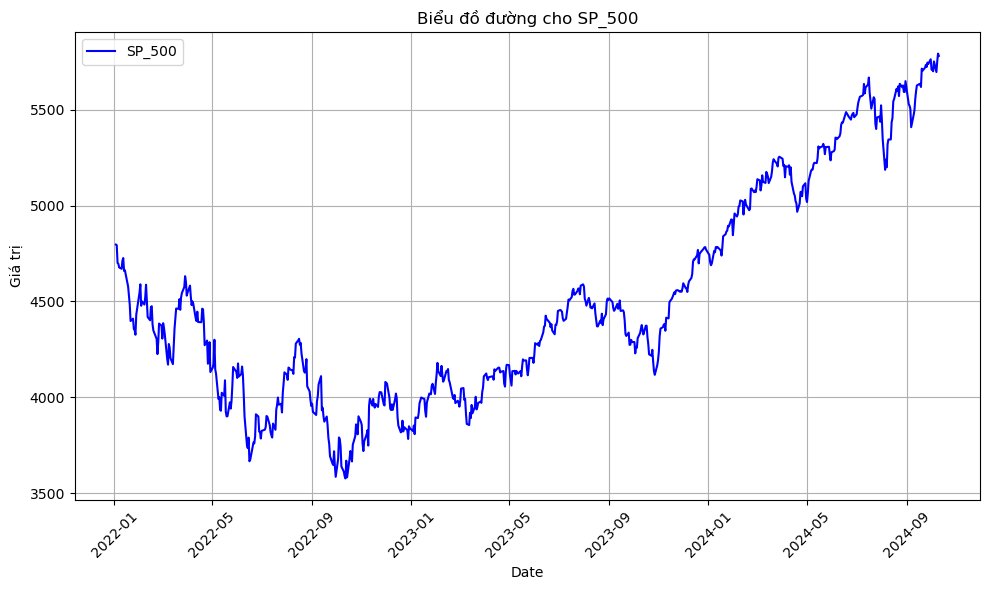

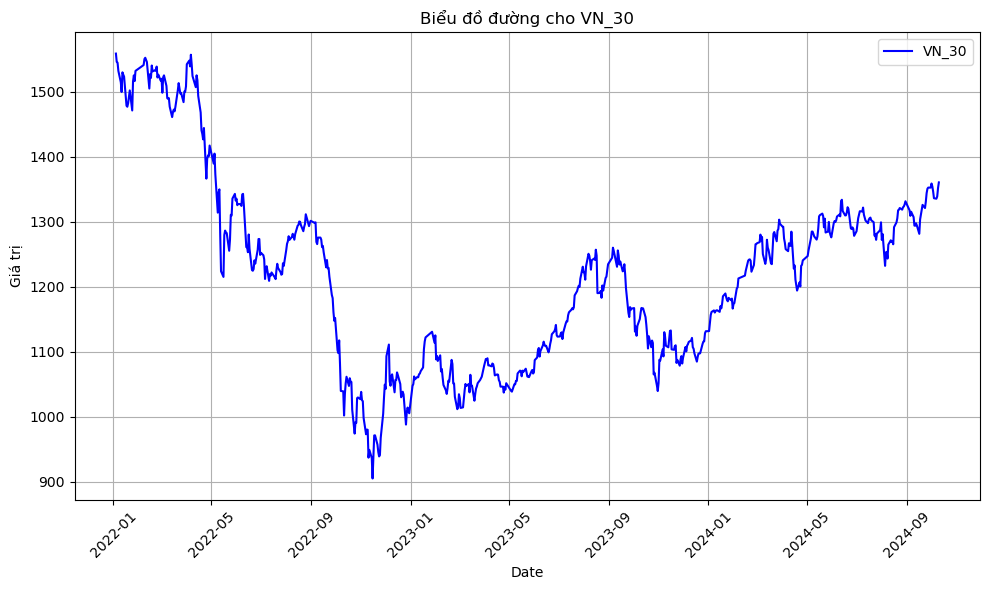

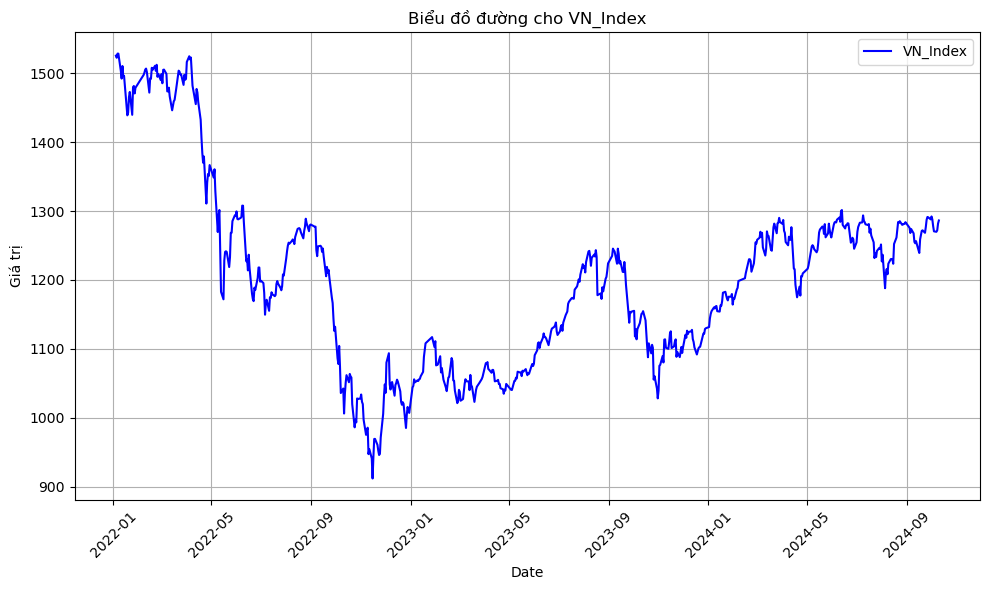

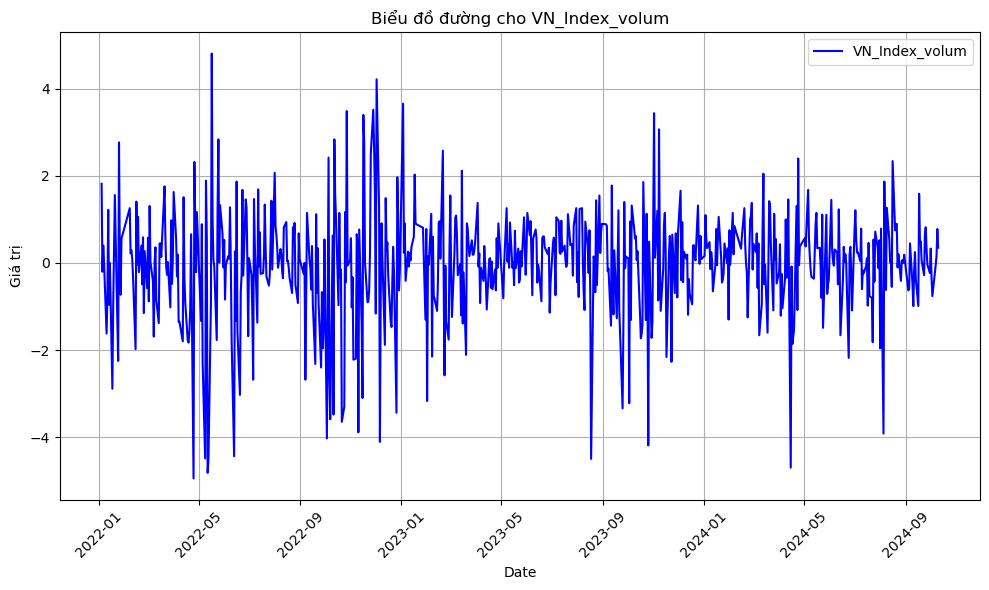

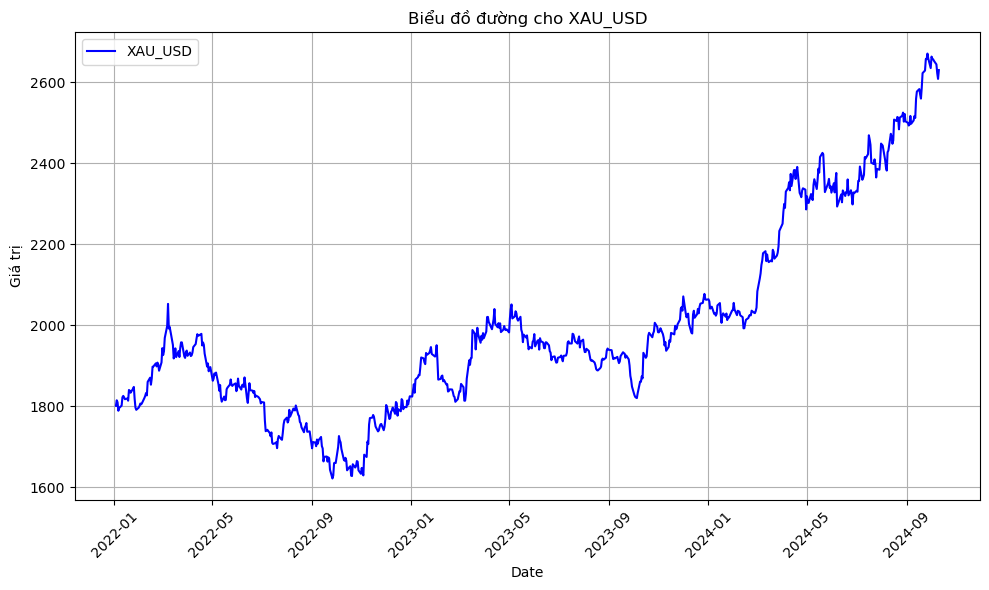

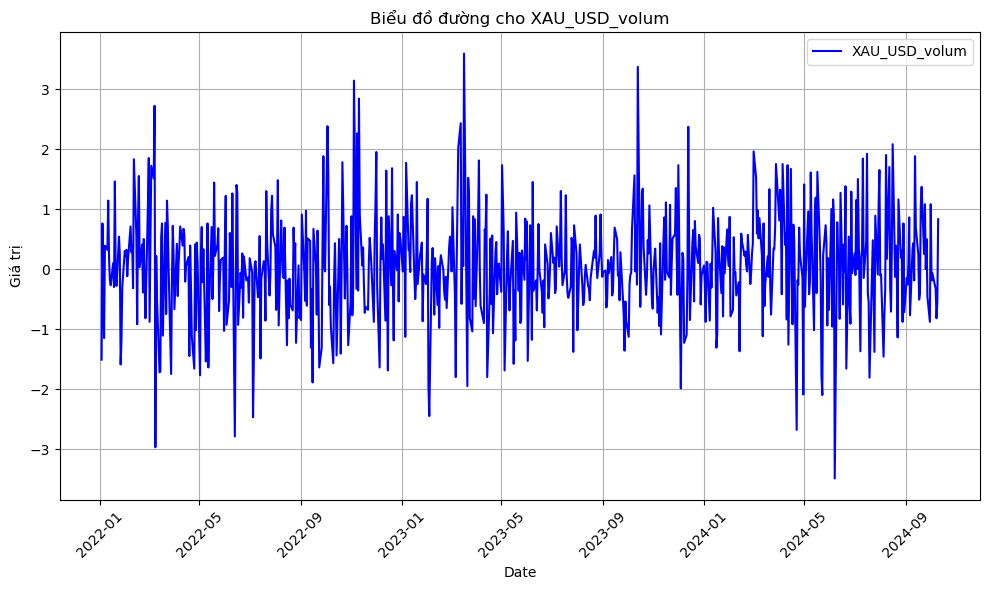

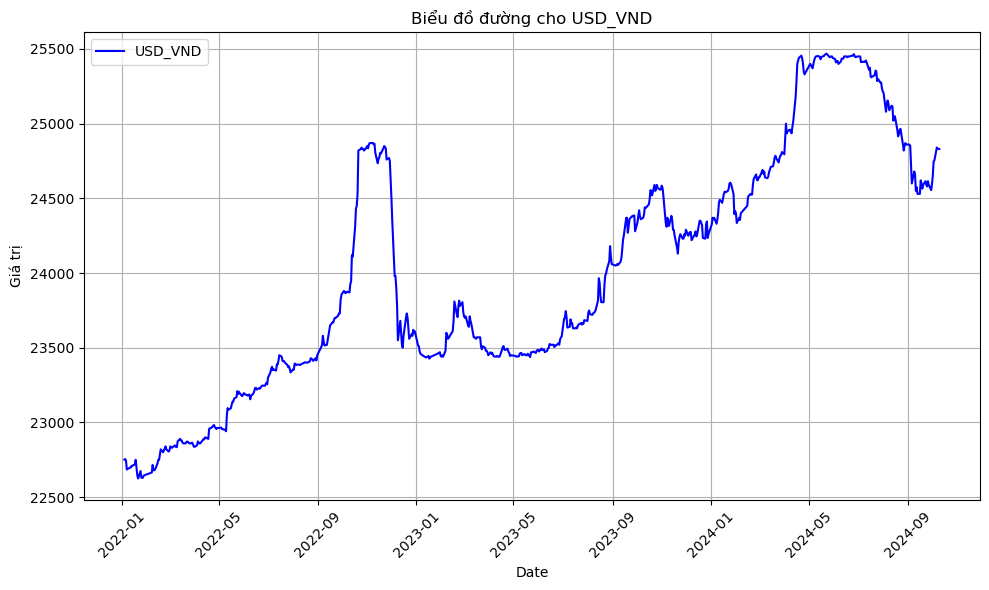

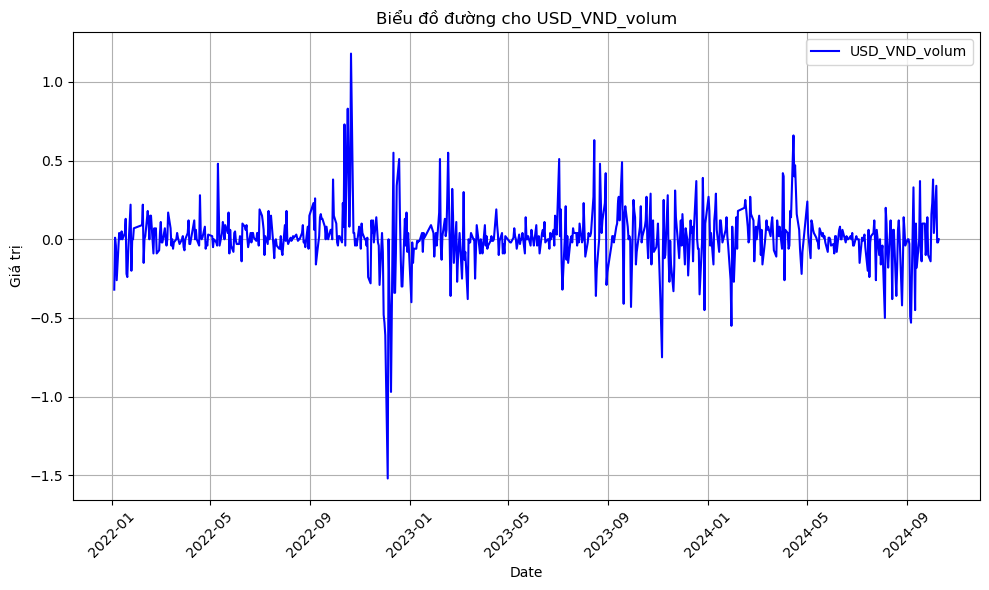

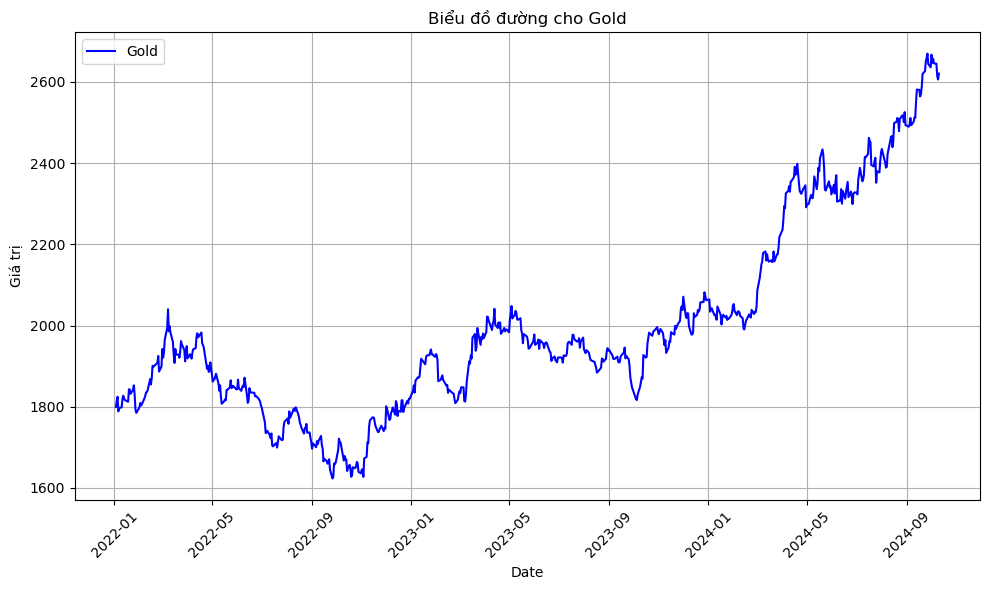

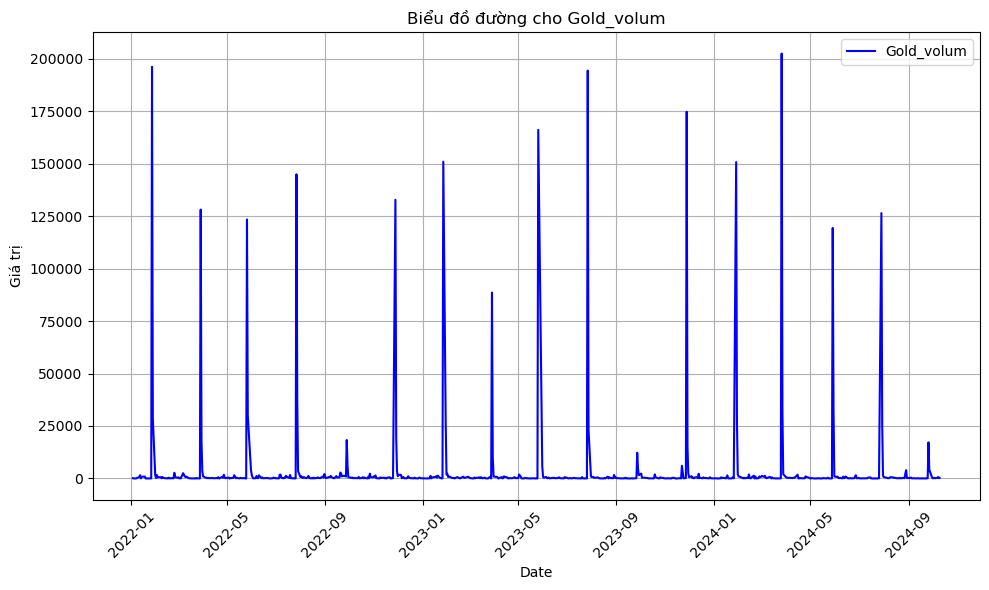

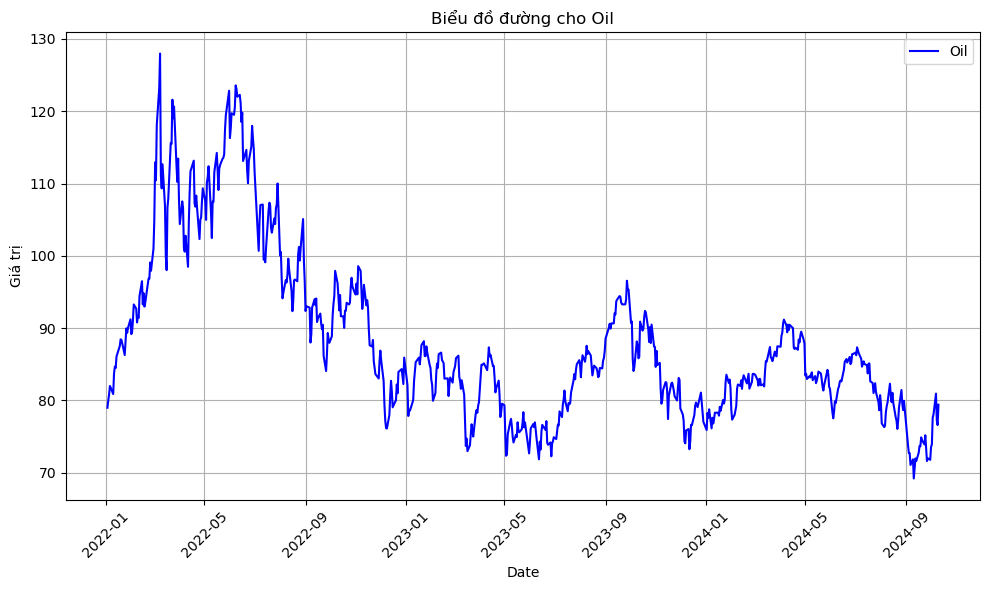

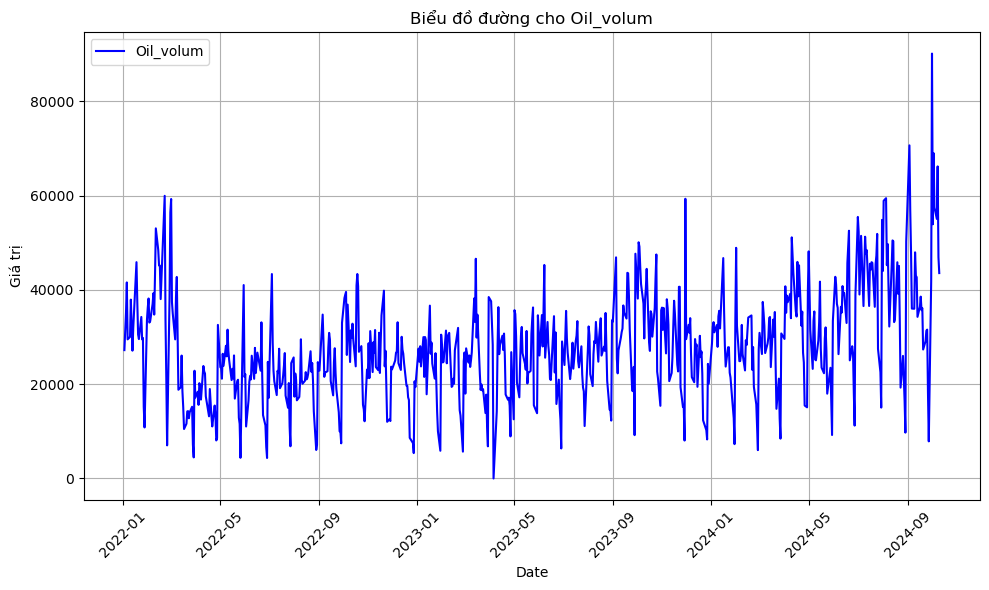

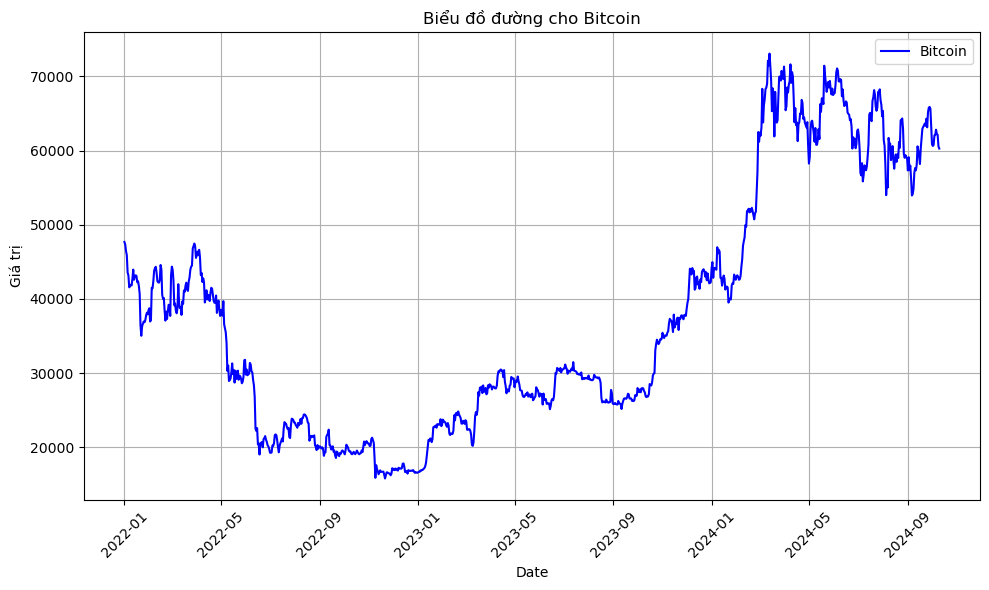

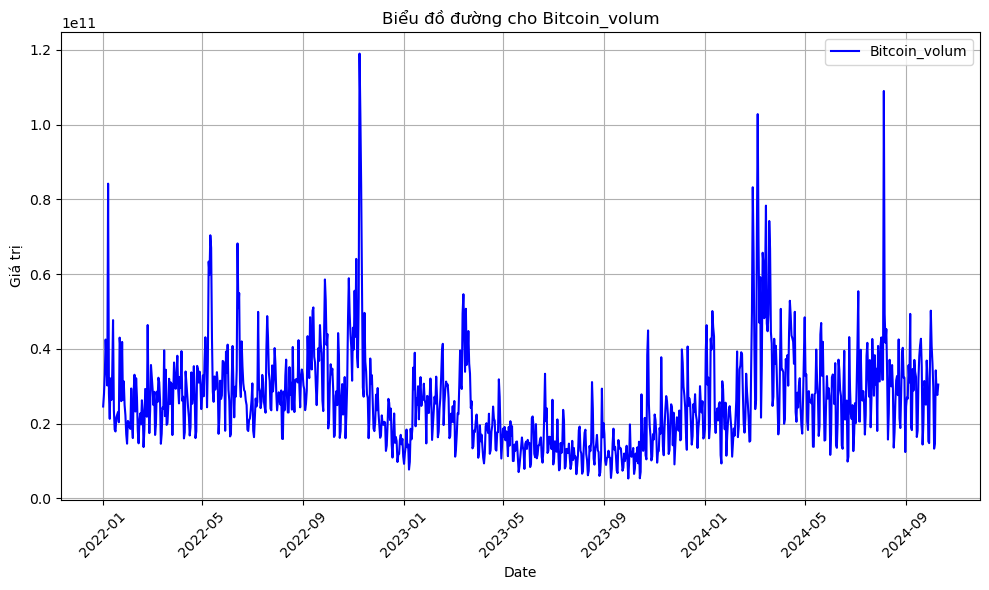

In [252]:
for column in df.columns:
    plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
    plt.plot(df.index, df[column], label=column, color='blue')
    plt.title(f"Biểu đồ đường cho {column}")
    plt.xlabel("Date")
    plt.ylabel("Giá trị")
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)  # Xoay nhãn trục x
    plt.tight_layout()  # Điều chỉnh bố cục
    plt.show()

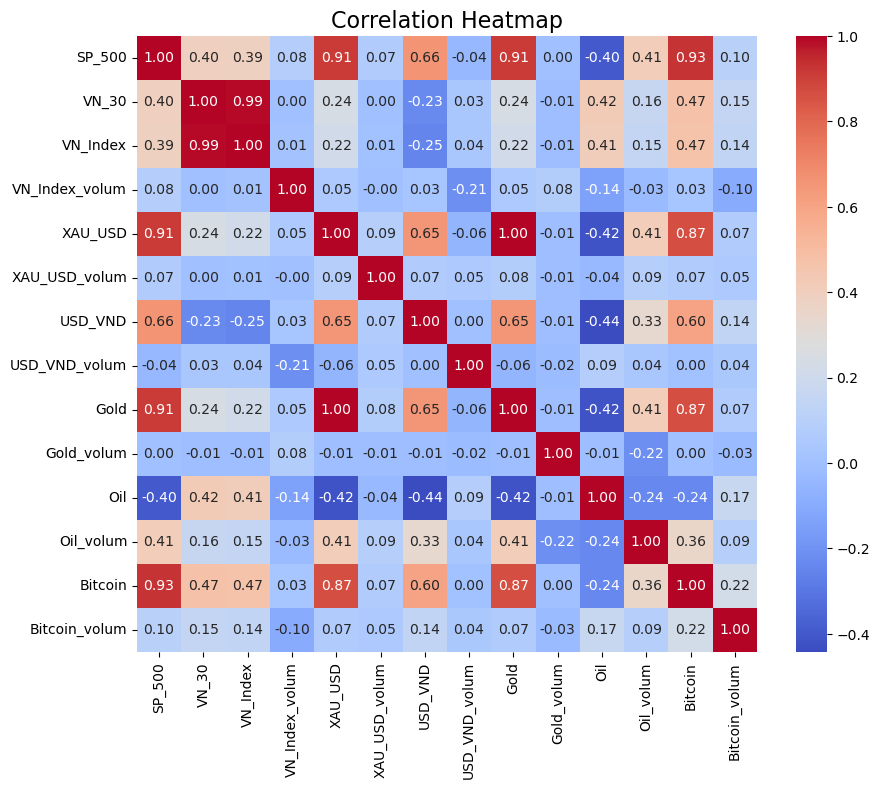

In [253]:
import seaborn as sns
# Tính ma trận tương quan
correlation_matrix = df.corr()

# Vẽ biểu đồ heatmap cho tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()